0    NOVA-RELAX
1          NOVA
2          PMFS
3        HUNTER
Name: file_system, dtype: object


'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


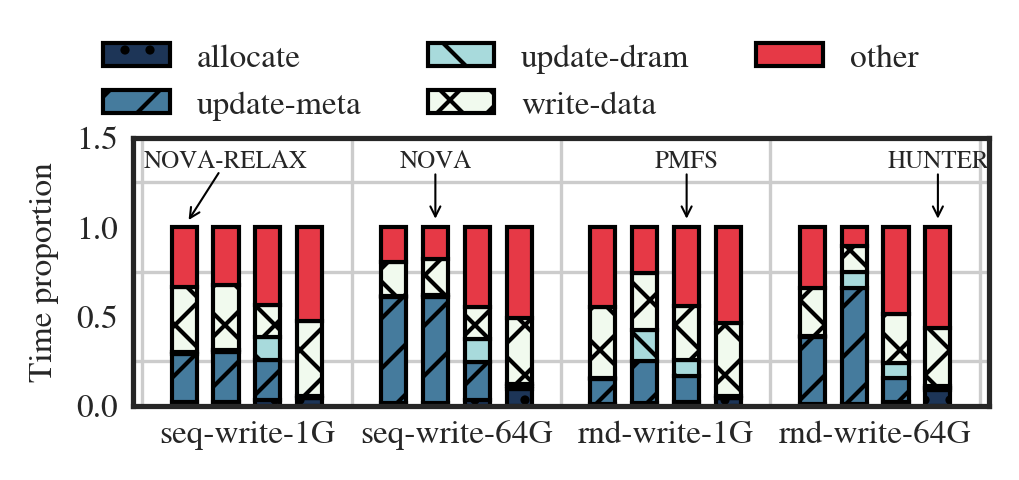

In [36]:
# ipython -c "%run plot.ipynb"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.ticker import MultipleLocator
import pandas as pd

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('seaborn-white')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["axes.grid.which"] = "minor"
plt.rcParams["grid.linewidth"] = 0.8
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("./performance-comparison-table", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

# Plotting Settings
fig,ax = plt.subplots()
fig.set_size_inches(cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(3.5))
fig.set_dpi(300)

bar_width = 0.2
patterns = ['..', '//', '\\\\', 'XX', '']
# Reference: https://designbro.com/blog/inspiration/color-combinations/
colors = ["#e63946", "#f1faee", "#a8dadc", "#457b9d", "#1d3557"] 
colors.reverse()
times = ["allocate", "update-meta", "update-dram", "write-data", "other"]

x = [1, 2, 3, 4]
fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
tot = len(fss) * bar_width

# normalize to 1
for i in range(0, 16):
    for time in times:
        df.loc[i, time] = df.iloc[i][time] / df.iloc[i]["total"]
    

print(fss)
for idx, fs in enumerate(fss):
    points = []
    for pivot in x:
        point = pivot - tot / 2 + bar_width / 2 + idx * bar_width
        bottom = 0
        for i, time in enumerate(times):
            height = df[(df['file_system'] == fs)][time].iloc[pivot - 1] 
            # / 1000
            # y = df[df['file_system'] == fs][time].tolist()
            # plt.bar(points[i], y, bar_width, color=colors[i], label=time, hatch=patterns[i])
            plt.bar(point, height=height, width=bar_width * 0.6, hatch=patterns[i], edgecolor='black', color=colors[i], bottom=bottom)
            bottom += height
        if pivot - 1 == idx:
            if fs == "NOVA-RELAX":
                plt.annotate(fs, xy=(point, bottom), xytext=(point + 0.2, bottom + 0.3 ), arrowprops=dict(arrowstyle="->", color='black', lw=0.5), ha='center', va='bottom', fontsize=6, bbox=dict(boxstyle='square,pad=-0.3',fc='none', ec='none'))
            else:
                plt.annotate(fs, xy=(point, bottom), xytext=(point, bottom + 0.3), arrowprops=dict(arrowstyle="->", color='black', lw=0.5), ha='center', va='bottom', fontsize=6, bbox=dict(boxstyle='square,pad=-0.3',fc='none', ec='none'))
            # plt.text(point, bottom + 5, fs, ha='center', va='bottom', fontsize=6)
            # plt.arrow(point, bottom + 5, 0, 5)

# Draw title
plt.xticks(x, labels=["seq-write-1G", "seq-write-64G", "rnd-write-1G","rnd-write-64G"], fontsize=8)
plt.yticks([0, 0.5, 1, 1.5], fontsize=8)
plt.ylabel('Time proportion', fontsize=8)
# plt.xlabel("File Size (GiB)", fontsize=8) 

fig.legend(times, loc='center', bbox_to_anchor=(0.5, 1), ncol=3, fontsize=8)

ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))

plt.tight_layout()
plt.savefig("./FIG-OverheadsBreakdown.pdf", bbox_inches='tight', pad_inches=0)
